**Import** **Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

from io import StringIO
import pydotplus
import graphviz

**Load Dataset**

In [25]:
data = pd.read_csv('/content/weatherdata.csv')
data.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,29-08-2023 10:45,26.3,79.3,...,16.8,20.7,2,2,5:56 AM,6:34 PM,5:32 PM,3:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,29-08-2023 10:45,25.6,78.1,...,4.9,6.6,1,1,6:00 AM,6:38 PM,5:36 PM,3:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.2,81.0,...,11.4,14.8,1,1,6:01 AM,6:39 PM,5:38 PM,3:42 AM,Waxing Gibbous,93


**Encode Target Variable**

In [26]:
data['condition_text'] = data['condition_text'].replace({
    1: 'clear',
    2: 'cloudy',
    3: 'light rain',
    4: 'light rain shower',
    5: 'mist',
    6: 'moderate or heavy rain shower',
    7: 'overcast',
    8: 'partly cloudy',
    9: 'patchy light rain with thunder',
    10: 'patchy rain possible',
    11: 'sunny'
})


**Feature Selection**

In [27]:
X = data[['temperature_celsius', 'temperature_fahrenheit']]
y = data['condition_text']

**Train Decision Tree**

In [28]:
clf = DecisionTreeClassifier(min_samples_split=2000, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(min_samples_split=2000, random_state=42)

**Prediction & Evaluation**

In [29]:
y_pred = clf.predict(X)

print(pd.crosstab(y, y_pred))
print(metrics.classification_report(y, y_pred))

col_0                           Sunny
condition_text                       
Clear                               1
Cloudy                             29
Light rain                          3
Light rain shower                   5
Mist                              142
Moderate or heavy rain shower       5
Overcast                            4
Partly cloudy                     196
Patchy light rain with thunder      1
Patchy rain possible              140
Sunny                             567
                                precision    recall  f1-score   support

                         Clear       0.00      0.00      0.00         1
                        Cloudy       0.00      0.00      0.00        29
                    Light rain       0.00      0.00      0.00         3
             Light rain shower       0.00      0.00      0.00         5
                          Mist       0.00      0.00      0.00       142
 Moderate or heavy rain shower       0.00      0.00      0.00         5
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Visualize Decision Tree**

In [32]:
class_names = [
    'clear',
    'cloudy',
    'light rain',
    'light rain shower',
    'mist',
    'moderate or heavy rain shower',
    'overcast',
    'partly cloudy',
    'patchy light rain with thunder',
    'patchy rain possible',
    'sunny'
]
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=['temperature_celsius', 'temperature_fahrenheit'],
    class_names=class_names
)

graph = graphviz.Source(dot_data)
graph

print(y.unique())



['Partly cloudy' 'Sunny' 'Cloudy' 'Mist' 'Patchy rain possible' 'Overcast'
 'Patchy light rain with thunder' 'Light rain shower'
 'Moderate or heavy rain shower' 'Clear' 'Light rain']


**Full Feature Decision Tree (Advanced)**

In [33]:
X_full = data[['country', 'location_name', 'region', 'latitude', 'longitude',
               'timezone', 'last_updated_epoch', 'temperature_celsius',
               'temperature_fahrenheit', 'wind_mph', 'wind_kph',
               'pressure_mb', 'humidity', 'cloud', 'uv_index']]

X_full = pd.get_dummies(X_full)
y = data['condition_text']

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9360730593607306


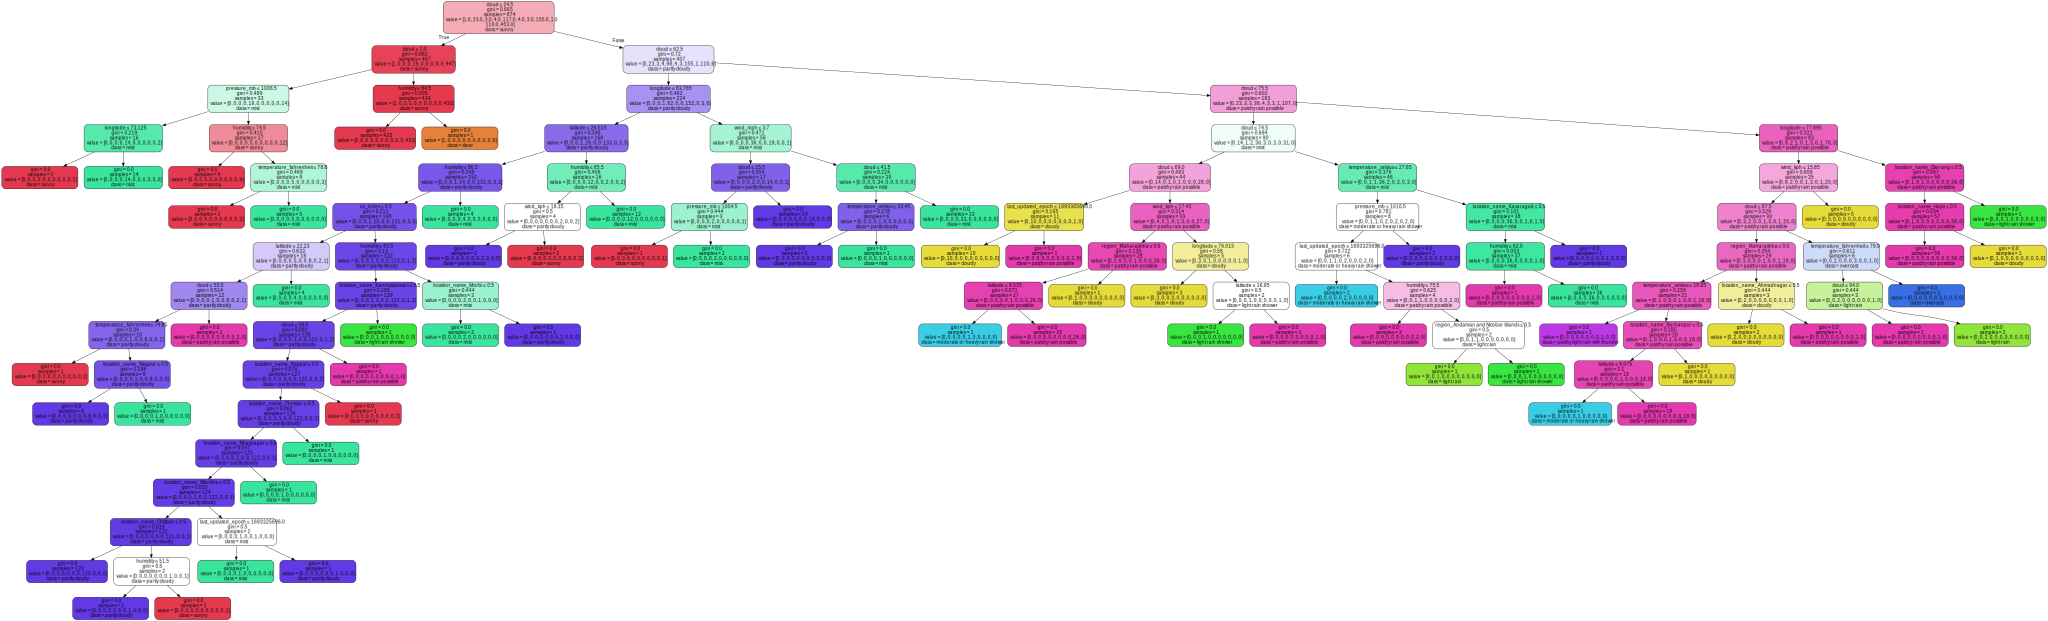

In [35]:
from sklearn.tree import export_graphviz
import graphviz

class_names = [
    'clear',
    'cloudy',
    'light rain',
    'light rain shower',
    'mist',
    'moderate or heavy rain shower',
    'overcast',
    'partly cloudy',
    'patchy light rain with thunder',
    'patchy rain possible',
    'sunny'
]

dot_data = export_graphviz(
    clf,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X_train.columns,   # MUST match training features
    class_names=class_names           # THIS removes numbers
)

graph = graphviz.Source(dot_data)
graph



**Import Libraries**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Load Dataset**

In [37]:
data = pd.read_csv('/content/weatherdata.csv')
print(data.shape)
data.head()


(1093, 40)


,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,29-08-2023 10:45,26.3,79.3,...,16.8,20.7,2,2,5:56 AM,6:34 PM,5:32 PM,3:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,29-08-2023 10:45,25.6,78.1,...,4.9,6.6,1,1,6:00 AM,6:38 PM,5:36 PM,3:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.2,81.0,...,11.4,14.8,1,1,6:01 AM,6:39 PM,5:38 PM,3:42 AM,Waxing Gibbous,93


**Extract Variables**

In [38]:
x = data['temperature_celsius'].values
y = data['temperature_fahrenheit'].values


**Manual Linear Regression Calculation**

In [39]:
mean_x = np.mean(x)
mean_y = np.mean(y)
m = len(x)

numer = 0
denom = 0

for i in range(m):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2

b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print("Slope (b1):", b1)
print("Intercept (b0):", b0)


Slope (b1): 1.800263563731565
Intercept (b0): 31.993522029668227


**Plot Regression & Scatter**

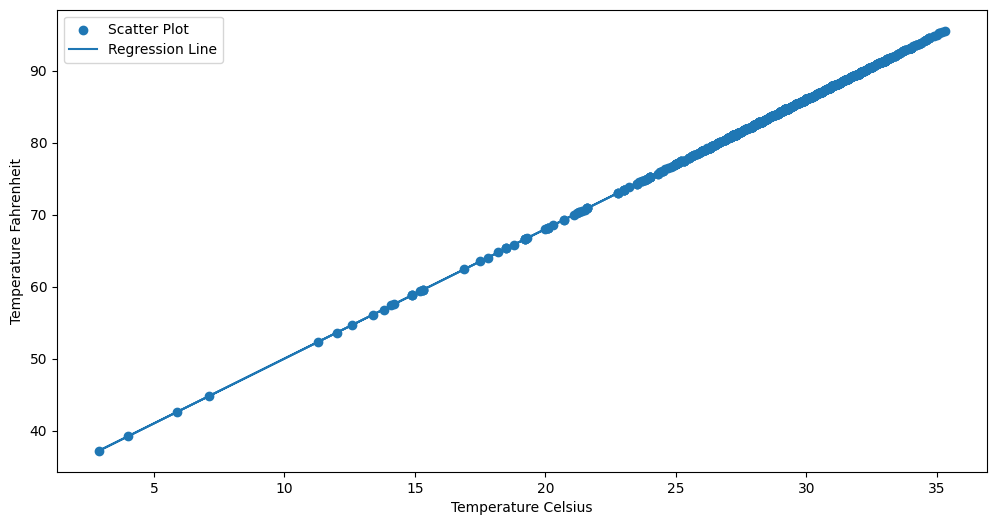

In [40]:
plt.figure(figsize=(12,6))

plt.scatter(x, y, label='Scatter Plot')
plt.plot(x, b0 + b1*x, label='Regression Line')

plt.xlabel('Temperature Celsius')
plt.ylabel('Temperature Fahrenheit')
plt.legend()
plt.show()

**R² Score (Manual)**

In [41]:
ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1 * x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2

r2 = 1 - (ss_r / ss_t)
print("R² Score (Manual):", r2)


R² Score (Manual): 0.9999856764671217


**Scikit-Learn Linear Regression**

In [42]:
x = x.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

print("R² Score (Sklearn):", reg.score(x, y))


R² Score (Sklearn): 0.9999856764671217
